<a href="https://colab.research.google.com/github/Md-jaber-hossain/Deep-learning-based-approach-for-recognition-and-classification-of-papaya-leaf-diseases/blob/main/The_Code_of_InceptionV3_Model_of_CNN_Algorithm_for_Papaya_Leaf_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import seaborn as sn
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Re-size all the images
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/train'
test_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/test'
valid_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/validation'

print ('train class size: ', len(train_path))
print ('test class size: ', len(test_path))
print ('valid class size: ', len(valid_path))

train class size:  56
test class size:  55
valid class size:  61


In [ ]:
# Import the inception v3 library

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# Number of output classes
folders = glob('/content/drive/MyDrive/papaya-leaf-disease-dataset/train/*')
print ('total class: ', len(folders))

total class:  5


In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# Create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# View the structure of the inception v3 model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5503 images belonging to 5 classes.


In [ ]:
valid_set = train_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 651 images belonging to 5 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 350 images belonging to 5 classes.


In [ ]:
x,y = test_set.next()
x.shape

(1, 224, 224, 3)

In [ ]:
# Fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/20
172/172 [==============================] - 2591s 15s/step - loss: 0.6874 - accuracy: 0.9122 - val_loss: 6.7552e-07 - val_accuracy: 1.0000
Epoch 2/20
172/172 [==============================] - 151s 878ms/step - loss: 0.0528 - accuracy: 0.9886 - val_loss: 0.2013 - val_accuracy: 0.9524
Epoch 3/20
172/172 [==============================] - 153s 889ms/step - loss: 0.0542 - accuracy: 0.9878 - val_loss: 4.2574e-05 - val_accuracy: 1.0000
Epoch 4/20
172/172 [==============================] - 142s 827ms/step - loss: 0.0620 - accuracy: 0.9896 - val_loss: 4.3142e-07 - val_accuracy: 1.0000
Epoch 5/20
172/172 [==============================] - 140s 812ms/step - loss: 0.0466 - accuracy: 0.9915 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
172/172 [==============================] - 140s 816ms/step - loss: 0.0194 - accuracy: 0.9958 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 7/20
172/172 [==============================] - 142s 826ms/step - loss: 0.1524 - accuracy: 0.9849 - val

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

350/350 - 13s - loss: 0.8702 - accuracy: 0.9686 - 13s/epoch - 38ms/step

Test accuracy: 0.9685714244842529


In [ ]:
model.save('/content/drive/MyDrive/papaya-leaf-disease-dataset/papaya-leaf-inception.h5')

In [ ]:
nb_samples = len(test_set)
print(nb_samples)

350


1/1 [==============================] - 0s 29ms/step


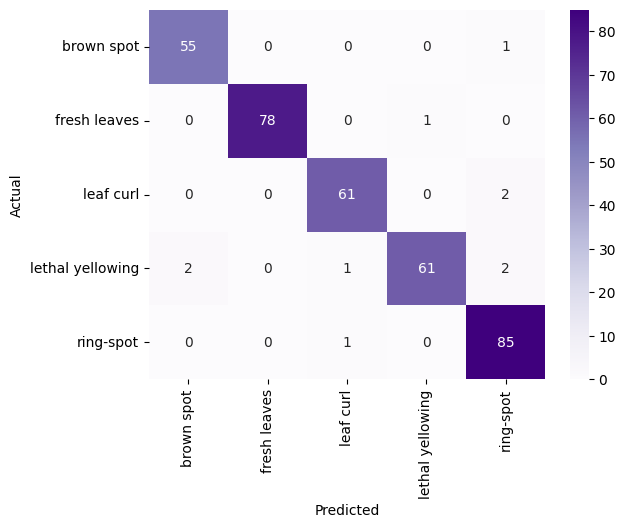

test accuracy : 97.14285714285714


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/papaya-leaf-disease-dataset/papaya-leaf-inception.h5")
filenames = test_set.filenames
y_prob=[]
y_act=[]
test_set.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_set.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Purples', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [ ]:
from sklearn.metrics import classification_report
class_label=list(test_set.class_indices.keys())
print(classification_report(actual_class, predicted_class,target_names=class_label))

                  precision    recall  f1-score   support

      brown spot       0.96      0.98      0.97        56
    fresh leaves       1.00      0.99      0.99        79
       leaf curl       0.97      0.97      0.97        63
lethal yellowing       0.98      0.92      0.95        66
       ring-spot       0.94      0.99      0.97        86

        accuracy                           0.97       350
       macro avg       0.97      0.97      0.97       350
    weighted avg       0.97      0.97      0.97       350



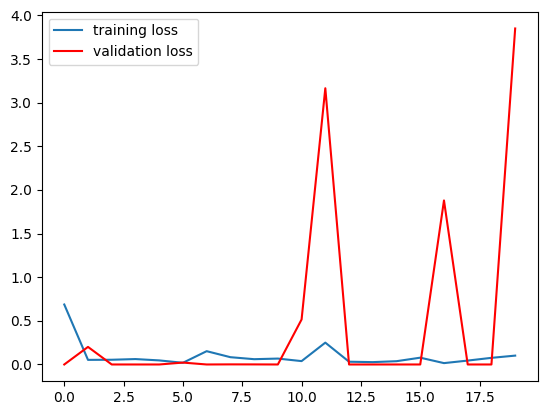

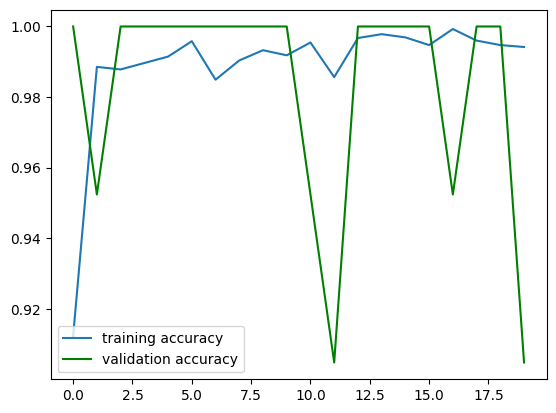

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='validation loss', color='red')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(r.history['accuracy'], label='training accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy', color='green')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import cv2
import os
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import keras.utils as image
#from keras.preprocessing import image

In [ ]:
training_set.class_indices

{'brown spot': 0,
 'fresh leaves': 1,
 'leaf curl': 2,
 'lethal yellowing': 3,
 'ring-spot': 4}

In [ ]:
#dir_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/test'
#for i in os.listdir(dir_path):
#    img = image.load_img(dir_path+ '//' + i , target_size=(200, 200))
#    plt.imshow(img)
#    plt.show()
#    x = image.img_to_array(img)
#    x = np.expand_dims(x, axis=0)
#    images = np.vstack([x])
#    classes =model.predict(images)
#    if classes[0]==0:
#        print("Brown spot")
#    elif classes[1]==1:
#        print("fresh leaves")
#    elif classes[1]==2:
#        print("leaf curl")
#    elif classes[1]==3:
#        print("lethal yellowing")
#    else:
#        print("ring-spot")

IsADirectoryError: ignored